In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

**EDA**

In [3]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [267]:
df_train.shape, df_test.shape

((4209, 378), (4209, 377))

In [268]:
pd.options.display.max_rows = None

In [5]:
df_train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [6]:
df_test.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

Check for null and unique values for test and train sets

In [7]:
df_train.isna().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [8]:
df_test.isna().any()

ID      False
X0      False
X1      False
X2      False
X3      False
        ...  
X380    False
X382    False
X383    False
X384    False
X385    False
Length: 377, dtype: bool

In [9]:
def print_unique_cat_columns(df):
    df_cat = df.select_dtypes(include = 'object')
    df_cat.head()
    for col in df_cat.columns:
        print(f"column {col}")
        print("------------------------")
        print(df_cat[col].unique())
        print(df_cat[col].value_counts())

In [10]:
print_unique_cat_columns(df_train)

column X0
------------------------
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
am     18
i      18
aq     18
u      17
l      16
aw     16
ad     14
au     11
k      11
b      11
r      10
as     10
bc      6
ao      4
c       3
q       2
aa      2
g       1
ab      1
ac      1
Name: X0, dtype: int64
column X1
------------------------
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52


In [11]:
print_unique_cat_columns(df_test)

column X0
------------------------
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
ak    432
y     348
z     335
x     302
ay    299
t     293
o     246
f     213
w     198
j     171
n     167
aj    162
az    161
s     116
ap    108
al     88
h      64
d      61
e      48
v      40
ai     38
af     34
m      34
am     28
i      25
at     21
u      20
ba     19
a      18
b      13
ad     12
k      12
aw     11
aq     11
r      10
ax      8
as      6
c       6
l       6
bc      6
ao      5
au      5
g       3
ag      1
ae      1
p       1
an      1
bb      1
av      1
Name: X0, dtype: int64
column X1
------------------------
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
aa    826
s     602
l     599
b     596
v     436
r     252
i     189
a     153

**Check out of sample values in each category of columns of test data**

In [12]:
df_train_cat = df_train.select_dtypes(include='object')
df_test_cat = df_test.select_dtypes(include='object')

for col in df_train_cat.columns:
    out_of_sample_values = [v for v in df_test_cat[col].unique() if v not in df_train_cat[col].unique()]
    if len(out_of_sample_values) > 0:
        print(df_test_cat[col].value_counts()[out_of_sample_values])

av    1
ag    1
an    1
ae    1
p     1
bb    1
Name: X0, dtype: int64
aj    1
ax    1
ab    4
w     3
ad    4
u     1
Name: X2, dtype: int64
t    1
b    1
a    1
z    1
Name: X5, dtype: int64


**Filling out of sample values by the mode value of the column**

In [13]:
for col in df_train_cat.columns:
    out_of_sample_values = [v for v in df_test_cat[col].unique() if v not in df_train_cat[col].unique()]
    if len(out_of_sample_values) > 0:
        df_test_cat.loc[df_test_cat[col].isin(out_of_sample_values), col] = df_test_cat[col].mode()[0]

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Apply label encoder

In [14]:
columns = df_train_cat.columns

for col in columns:
    le = LabelEncoder()
    df_train_cat[col] = le.fit_transform(df_train_cat[col])
    df_test_cat[col] = le.transform(df_test_cat[col])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df_train_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


In [16]:
df_test_cat.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,20,23,34,5,3,25,0,22
1,40,3,7,0,3,25,6,24
2,20,23,16,5,3,25,9,9
3,20,13,34,5,3,25,11,13
4,43,20,16,2,3,28,8,12


# Verify variance of target variable with the categorical features using ANOVA

In [17]:
temp_df = pd.concat((df_train['y'],df_train_cat), axis = 1)

In [18]:
model = ols("y~C(X0)+C(X1)+C(X2)+C(X3)+C(X4)+C(X5)+C(X6)+C(X8)",data=temp_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
#model.summary()

,sum_sq,df,F,PR(>F)
C(X0),206535.179273,46.0,66.318128,0.000000e+00
C(X1),1651.036730,26.0,0.937949,5.539314e-01
C(X2),4868.705236,43.0,1.672404,3.962290e-03
C(X3),359.486951,6.0,0.884969,5.048417e-01
C(X4),590.113729,3.0,2.905431,3.343685e-02
C(X5),6498.750565,28.0,3.428214,3.029852e-09
C(X6),778.815154,11.0,1.045774,4.023786e-01
C(X8),1478.635578,24.0,0.910010,5.887769e-01
Residual,272298.979688,4022.0,NaN,NaN


From above analysis we consider p-values < 0.05, the independent categorical variable affects significantly the output are X0, X2, X4, X5

In [19]:
model = ols("y~C(X0)+C(X2)+C(X4)+C(X5)",data=temp_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(X0),238351.657972,46.0,76.484348,0.000000e+00
C(X2),5249.014700,43.0,1.801862,1.071471e-03
C(X4),554.148092,3.0,2.726571,4.257719e-02
C(X5),6688.684638,28.0,3.526102,1.119647e-09
Residual,277016.021071,4089.0,NaN,NaN


In [20]:
columns = ["X0","X2","X4","X5"] #cat columns to be considered

In [21]:
df_train = df_train.drop(df_train.select_dtypes(include='object').columns, axis = 1)
df_test = df_test.drop(df_test.select_dtypes(include='object').columns, axis = 1)

In [22]:
df_train.head()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_train = pd.concat((df_train, df_train_cat[columns]), axis = 1)
df_test = pd.concat((df_test, df_test_cat[columns]), axis = 1)

In [24]:
df_train.shape, df_test.shape

((4209, 374), (4209, 373))

In [25]:
df_train.head()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X379,X380,X382,X383,X384,X385,X0,X2,X4,X5
0,0,130.81,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,32,17,3,24
1,6,88.53,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,32,19,3,28
2,7,76.26,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,20,34,3,27
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,34,3,27
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20,34,3,12


In [26]:
X_train = df_train.drop(['ID','y'], axis = 1)
X_test = df_test.drop('ID', axis = 1)

In [27]:
y_train = df_train["y"]

Before implementing the PCA it is required to feature scale the data, we have data in categorical variables which are having large values compared to discrete columns having 0 or 1. We will Feature scale only categorical variables after LabelEncoder is applied

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()
X_train[columns] = sc.fit_transform(X_train[columns])
X_test[columns] = sc.transform(X_test[columns])

In [52]:
X_train[columns].head()

,X0,X2,X4,X5
0,0.163012,-0.028122,0.028938,1.292117
1,0.163012,0.155388,0.028938,1.776974
2,-0.710560,1.531709,0.028938,1.655760
3,-0.710560,1.531709,0.028938,1.655760
4,-0.710560,1.531709,0.028938,-0.162454


# Perform Dimensionality Reduction using  PCA 

In [103]:
pca = TruncatedSVD(n_components = 11)
X_pca = pca.fit(X_train.drop(columns, axis=1))

In [104]:
X_pca.explained_variance_ratio_.sum()

0.6115011692261131

In [152]:
pca = TruncatedSVD(n_components = 2)
X_train_pca = pca.fit_transform(X_train.drop(columns, axis=1))
X_test_pca = pca.transform(X_test.drop(columns, axis=1))

In [153]:
X_train_pca.shape, X_test_pca.shape

((4209, 2), (4209, 2))

In [160]:
Xtrain, Xtest, ytrain, ytest =  train_test_split(np.column_stack((X_train_pca,X_train[columns].values)), y_train, test_size = 0.2, random_state = 42)

In [161]:
train_dmatrix = xgb.DMatrix(data = Xtrain, label = ytrain)
test_dmatrix = xgb.DMatrix(data = Xtest, label = ytest)

params = {'eta': np.arange(0.1, 0.5,0.1),
          'max_depth': np.arange(3,12,1),
          'objective': ['reg:squarederror'],
         #'n_estimators': [10,20,50,80,100],
         'alpha': np.arange(10,150,10),
          'lambda': np.arange(10,150,10)
         }

In [162]:
params = {'eta': 0.1,
          'max_depth': 4,
          'objective': 'reg:squarederror', 
          'alpha': 50,
          'eval_metric': 'rmse',
          'booster': 'dart'
         }

In [145]:
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

In [163]:
watchlist = [(train_dmatrix, 'train'), (test_dmatrix, 'test')]

In [166]:
xgbmodel = xgb.train(params, train_dmatrix, 70, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize = True, verbose_eval=10)

[0]	train-rmse:91.05317	test-rmse:90.94344	train-r2:-50.17792	test-r2:-52.13660
Multiple eval metrics have been passed: 'test-r2' will be used for early stopping.

Will train until test-r2 hasn't improved in 50 rounds.
[10]	train-rmse:33.16594	test-rmse:33.05345	train-r2:-5.79012	test-r2:-6.01915
[20]	train-rmse:14.52623	test-rmse:14.34916	train-r2:-0.30256	test-r2:-0.32283
[30]	train-rmse:9.79472	test-rmse:9.50910	train-r2:0.40779	test-r2:0.41906
[40]	train-rmse:8.81215	test-rmse:8.54259	train-r2:0.52065	test-r2:0.53115
[50]	train-rmse:8.50538	test-rmse:8.31173	train-r2:0.55344	test-r2:0.55615
[60]	train-rmse:8.31850	test-rmse:8.24361	train-r2:0.57285	test-r2:0.56340
[69]	train-rmse:8.18302	test-rmse:8.20247	train-r2:0.58665	test-r2:0.56775


<function matplotlib.pyplot.show(close=None, block=None)>

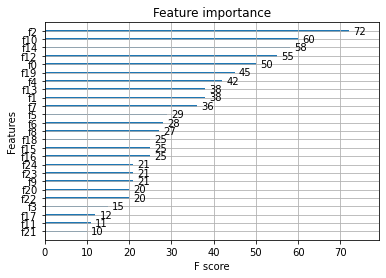

In [320]:
xgb.plot_importance(xgbmodel)
plt.show

In [321]:
xgbmodel.get_score(importance_type='weight')

{'f2': 72,
 'f7': 36,
 'f0': 50,
 'f12': 55,
 'f10': 60,
 'f1': 38,
 'f4': 42,
 'f9': 21,
 'f14': 58,
 'f16': 25,
 'f23': 21,
 'f3': 15,
 'f5': 29,
 'f19': 45,
 'f15': 25,
 'f13': 38,
 'f18': 25,
 'f24': 21,
 'f22': 20,
 'f20': 20,
 'f21': 10,
 'f17': 12,
 'f8': 27,
 'f6': 28,
 'f11': 11}

In [167]:
predictions = xgbmodel.predict(test_dmatrix)
np.column_stack((ytest,predictions))[:20]

array([[ 97.94      ,  93.80281067],
       [ 96.41      ,  93.56922913],
       [105.83      , 110.89054871],
       [ 79.09      ,  80.92787933],
       [108.69      , 112.42713165],
       [ 94.6       ,  97.16529083],
       [ 84.48      ,  93.55615234],
       [110.24      , 104.79795074],
       [120.8       , 105.13336945],
       [122.66      , 113.30325317],
       [ 85.94      ,  79.18530273],
       [ 88.05      ,  94.56945801],
       [ 90.01      ,  93.08896637],
       [140.25      , 103.78453827],
       [ 98.25      ,  94.71912384],
       [101.59      ,  97.60845184],
       [105.43      , 111.08815002],
       [ 91.94      ,  95.56655884],
       [ 93.02      ,  95.4903717 ],
       [110.2       , 111.59592438]])

In [168]:
np.sqrt(mean_squared_error(ytest, predictions))

8.202465878554348

In [169]:
r2_score(ytest, predictions)

0.5677451167502592

# Prediction for test dataset

In [171]:
valid_dmatrix = xgb.DMatrix(data = np.column_stack((X_test_pca,X_test[columns].values))

test_df_pred = pd.DataFrame(xgbmodel.predict(valid_dmatrix).reshape(-1,1), columns = ['y'])

SyntaxError: invalid syntax (<ipython-input-171-eedf1d8e67f5>, line 3)

In [334]:
df_test = pd.concat((df_test, test_df_pred), axis=1)
df_test.head()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X380,X382,X383,X384,X385,X0,X2,X4,X5,y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,20,34,3,25,76.181961
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,40,7,3,25,93.918526
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,20,16,3,25,85.020744
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,20,34,3,25,76.405983
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,43,16,3,28,109.892303


In [336]:
df_test.to_csv("Predicted_test.csv", index=False)